# Dogs vs Cats Image Classification Without Image Augmentation

# Importing required packages

In [55]:
import tensorflow as tf

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
import os # to read files and access directories
import matplotlib.pyplot as plt # to plot the graph and display images in our training and validation data
import numpy as np # for some matrix math outside of TensorFlow

In [58]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Import Dataset

 We need to directly download Dogs vs. Cats from a URL and unzip it to the Colab filesystem.

In [59]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [60]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [61]:
base_dir = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures

validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

Let's look at how many cats and dogs images we have in our training and validation directory.

In [62]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [63]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("-"*33)
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
---------------------------------
Total training images: 2000
Total validation images: 1000


# Setting Model Parameters

In [64]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

# Data Preparation

In [65]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [66]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [67]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


# Visualizing training images

In [68]:
sample_training_images, _ = next(train_data_gen)

In [69]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plot_images(images_array):
    fig, ax = plt.subplots(1,5, figsize=(20,20))
    ax = ax.flatten()
    for img, ax in zip(images_array, ax):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

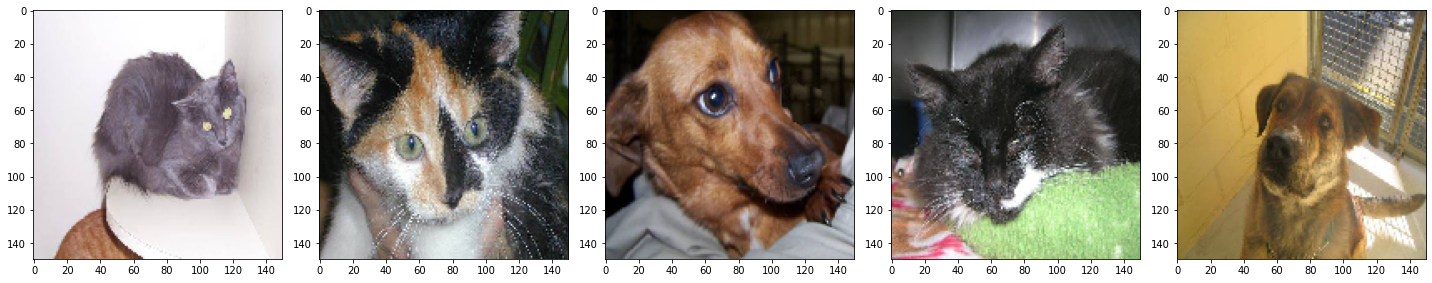

In [70]:
plot_images(sample_training_images[0:5])

# Model Creation

## Define model

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

## Compile model

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 64)      

## Train model

In [78]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 100s 5s/step - loss: 0.7091 - accuracy: 0.4830 - val_loss: 0.6923 - val_accuracy: 0.5790
Epoch 2/100
20/20 [==============================] - 96s 5s/step - loss: 0.6877 - accuracy: 0.5490 - val_loss: 0.6694 - val_accuracy: 0.5610
Epoch 3/100
20/20 [==============================] - 91s 5s/step - loss: 0.6740 - accuracy: 0.5685 - val_loss: 0.6551 - val_accuracy: 0.5970
Epoch 4/100
20/20 [==============================] - 92s 5s/step - loss: 0.6510 - accuracy: 0.6090 - val_loss: 0.6192 - val_accuracy: 0.6530
Epoch 5/100
20/20 [==============================] - 90s 5s/step - loss: 0.6172 - accuracy: 0.6405 - val_loss: 0.6101 - val_accuracy: 0.6530
Epoch 6/100
20/20 [==============================] - 91s 5s/step - loss: 0.5805 - accuracy: 0.6890 - val_loss: 0.5917 - val_accuracy: 0.6760
Epoch 7/100
20/20 [==============================] - 98s 5s/step - loss: 0.5441 - accuracy: 0.7165 - val_loss: 0.5573 - val_accuracy: 0.7120
Epoch 8/100
20/20 [=====

## Visualizing results of training

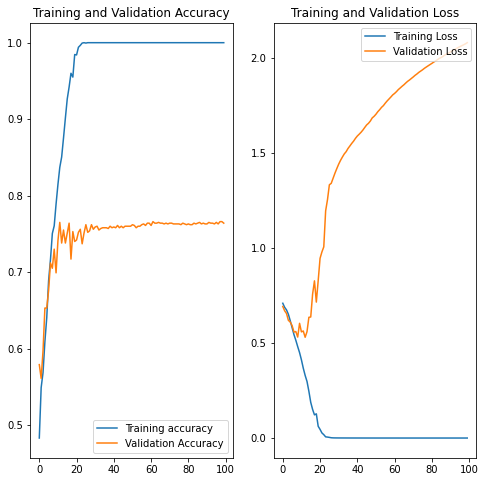

In [80]:
accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs= range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, valid_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

As we can see from the plots, training accuracy and validation accuracy are off by large margin and our model has achieved only around 70% accuracy on the validation set (depending on the number of epochs you trained for).

This is a clear indication of overfitting. Once the training and validation curves start to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.